<a href="https://colab.research.google.com/github/aida-wofford/Carmen/blob/main/plot_s99.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
__author__ = 'Aida Wofford <awofford@astro.unam.mx>'
__version__ = '20210426'
__datasets__ = ['HST']  # datos usados en este notebook
__keywords__ = ['Carmen', 'Licenciatura', 'HST', 'Starburst99'], # palabras clave relevantes a este notebook

# Modelos de síntesis de poblaciones estelares.

* Los modelos de síntesis de poblaciones estelares son espectros modelados de cúmulos estelares o galaxias. 
* Dichos espectros generalmente corresponden a la suma de los espectros de todas las estrellas, sin incluir ni al gas interestelar ni al polvo. 
* Sin embargo, algunos modelos si incluyen estas últimas dos componentes.



# Starburst99.

* Starburst99 (S99) es un código que permite generar modelos de síntesis de poblaciones estelares. 
* Trabajaremos con espectros de S99 que corresponden a la suma de los espectros de todas las estrellas, sin incluir ni al gas interestelar ni al polvo.
* Las referencias de abajo describen el código Starburst99 y los modelos de evolución estelar que son utilizados en estos modelos.
* The starburst99 website is:
* https://www.stsci.edu/science/starburst99/docs/default.htm
* The output files are described here:
* Geneva High 1994 tracks: tracks and atmospheres match
* Geneva High 2013 tracks: tracks and atmospheres do not match
* .ifaspec1 files contain the high-resolution UV line spectrum from model atmospheres, as opposed to using an empirical library. 
* The non-rotating (V00) models are discussed by Leitherer et al. (2010):
* https://ui.adsabs.harvard.edu/abs/2010ApJS..189..309L/abstract
* The rotating (v40) models are discussed in Leitherer et al. (2014): 
* https://ui.adsabs.harvard.edu/abs/2014ApJS..212...14L/abstract
* Some of the degeneracies that exist are described here:
* http://research.iac.es/proyecto/traces/research/stellar-population-synthesis-models/

# Objetivos

* Vamos a graficar predicciones de S99 del doblete de C IV $\lambda\lambda$1548, 1551, para cúmulos de estrellas modelados de metalicidades y edades diferentes. 
* 1548 y 1551 son longitudes de onda en Angstroms porque las preceden los símbolos $\lambda\lambda$. 
* Este doblete tiene forma un perfil tipo P-Cygni cuando la población estelar continen estrellas tipo espectral O. El doblete se genera en los vientos de dichas estrellas.
* La metalicidad es: Z = masa de metales / (masa de H + masa de He + masa de metales).
* Vamos a asumir que los todas las estrellas en el cúmulo nacieron al mismo tiempo. Decimos entonces que estamos modelando una "Simple Stellar Population" (SSP). Otro caso que a menudo se modela es el de formación estelar continua "Continuous Star Formation".
* La distribución de masa de las estrellas al inicio, se conoce como la Función Inicial de Masa (Initial Mass Funcion, IMF). La IMF me dice cuántas estrellas hay en cada intervalo de masa entre 0.1 hasta 100 veces la masa del sol, para una masa total inicial del cúmulo. Un ejemplo de masa total es 10^4 veces la masa del sol. Vamos a asumir una IMF estándar tipo Salpeter.


# Ejercicio en clase 1.

Ve a la página de S99, luego Run your own simulation y encuentra algunos de los parámetros mencionados arriba en la interfaz.

# Tarea 1. 

* El overleaf de la tesis está aquí:
https://www.overleaf.com/7823346943bxxxmqrjqdzs
* En las secciones correspondientes de dicho overleaf...


1.   Describir qué es un modelo de síntesis de poblaciones estelares y cuáles son sus ingredientes principales.
2.   Investigar cómo se forma un perfil tipo P-Cygni. 

# Práctica.

Vamos a comparar resultados para dos metalicidades:
* La metalicidad del sol (Z=0.014).
* Z=0.040, que corresponde a una metalicidad super solar.




In [ ]:
cluster_metallicities=['Z=0.014', 'Z=0.040']

Edades de los cúmulos estelares modelados.

In [6]:
t0 = .1e5 # initial time step in Myr
cluster_ages = [2e6, 4e6, 6e6, 8e6, 10e6, 8e6, 9e6]# in Myr

Load from text file:
* wavelength (wave), 
* log(luminosity) (logL), and 
* normalized luminosity (norm)

In [10]:
import numpy as np

models=['v00_z014', 'v40_z014']

# v00 models
data=np.loadtxt('https://raw.githubusercontent.com/aida-wofford/Carmen/main/v00_z014.ifaspec1', skiprows=6, delimiter="       ")
time_v00, wave_v00, logL_v00, norm_v00 = np.transpose(data)

# v40 models
data=np.loadtxt('https://raw.githubusercontent.com/aida-wofford/Carmen/main/v40_z014.ifaspec1', skiprows=6, delimiter="       ")
time_v40, wave_v40, logL_v40, norm_v40 = np.transpose(data)

Define wavelength range to plot.

In [11]:
x0 = 1550 # Wavelength in Angstroms
xr = [x0-29, x0+29] # Wavelength range
yr = [0, 2] # Normalized luminosity range

Definition for smoothing spectra.

In [12]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

Import plotting package.

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

* Prepare plot.
* Select spectrum for each model (non-rotating and rotating) and each cluster age.
* Plot.

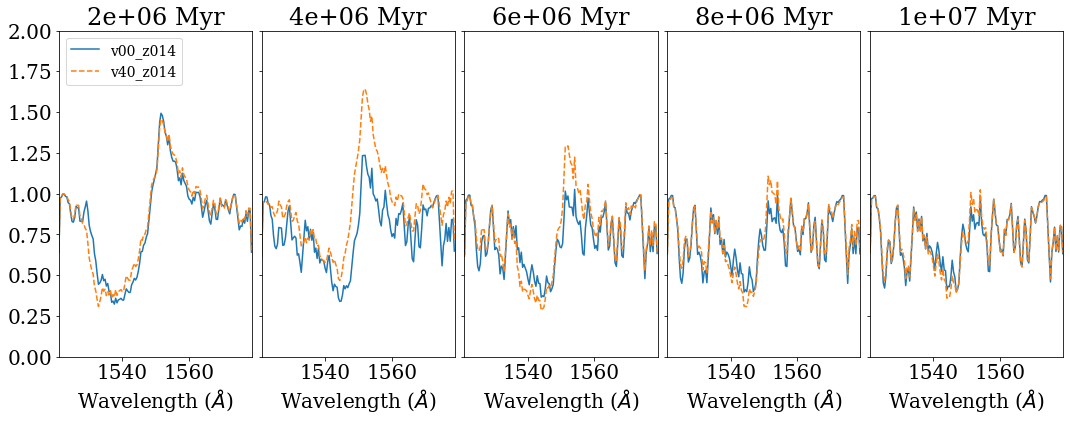

In [15]:
# Figure size and subplots
size=20
font = {'family' : 'serif',
        'weight' : 'regular',
        'size'   : size}
plt.rc('font', **font)
fig, axes = plt.subplots(1,5,figsize=(18,6))
(ax1,ax2,ax3,ax4,ax5) = axes
plt.subplots_adjust(hspace=0.1)
plt.subplots_adjust(wspace=0.05)

for imodel in range(2):
    if imodel == 1:
        linestyle = '--' 
        time = time_v40
        wave = wave_v40
        norm = norm_v40
    else:
        linestyle = '-'
        time = time_v00
        wave = wave_v00
        norm = norm_v00        
    for iage in range(5):
        if imodel == 0:
            axes[iage].set_xlim(xr[0],xr[1])
            axes[iage].set_ylim(yr[0],yr[1])        
            axes[iage].set_xlabel('Wavelength ($\AA$)')
            axes[iage].set_title(str("{:.0e}".format(cluster_ages[iage]))+' Myr')
            if iage > 0:              
                axes[iage].set_yticklabels([])
        good_indices = np.where(time == cluster_ages[iage] + t0)
        x=wave[good_indices]
        y=norm[good_indices]
    # Crop spectrum to include only wavelength range of interest.
        good_indices = np.where(x >= xr[0])
        x=x[good_indices]
        y=y[good_indices]
        good_indices = np.where(x <= xr[1])
        x=x[good_indices]
        y=y[good_indices]
        if iage == 0:
            axes[iage].plot(x, smooth(y,3), label=models[imodel],linestyle=linestyle) # Legend
            axes[iage].legend(fontsize='x-small',loc='upper left')
        else:
            axes[iage].plot(x, smooth(y,3), linestyle=linestyle)
        

# Tarea 2.

Hacer una gráfica similar pero que compare los siguientes modelos: v00_z014 y v00_z040. ¿Qué diferencias notas?